In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import json

In [2]:
parent_dir = 'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\'
working_folder = 'Three Stage RO' 
results_folder = 'results NN 2SRO'

In [3]:
I = 30

In [4]:
file_name_NN = "results_2SRO_"+str(I)+".json"
file_name_exact = "results_2SRO_exact"+str(I)+".json"
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name_NN)
with open(file_path, 'r') as file:
    result_NN = json.load(file)
    
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name_exact)
with open(file_path, 'r') as file:
    result_exact = json.load(file)

In [5]:
result_NN["1"].keys()

dict_keys(['Master_solution', 'iterations_to_convergence', 'Adversarial_solution', 'lower_bound_CCG', 'upper_bound_CCG'])

In [6]:
result_NN["1"]['Master_solution']['objective_value']

-10229.491437390874

In [7]:
result_exact['1'].keys()

dict_keys(['Master_solution', 'iterations_to_convergence', 'Adversarial_solution', 'lower_bound_CCG', 'upper_bound_CCG'])

In [8]:
result_exact['1']['Master_solution']['objective_value']

-10049.177141318409

In [9]:
objective_value_dict_NN = dict()
objective_value_dict_exact = dict()
objective_value_diff = dict()

In [10]:
objective_value_dict_NN[I] = np.array([result_NN[str(x)]['Master_solution']['objective_value'] for x in range(1,251)])
#objective_value_dict_exact[I] = np.array([result_exact[str(x)]['lower_bound_CCG'] for x in range(1,251)])
objective_value_dict_exact[I] = np.array([result_exact[str(x)]['Master_solution']['objective_value'] for x in range(1,251)])
objective_value_diff[I] = objective_value_dict_NN[I] - objective_value_dict_exact[I]

(array([ 2.,  0.,  4., 20., 49., 47., 58., 36., 27.,  7.]),
 array([-6.56151839, -5.2360655 , -3.91061261, -2.58515972, -1.25970684,
         0.06574605,  1.39119894,  2.71665183,  4.04210471,  5.3675576 ,
         6.69301049]),
 <BarContainer object of 10 artists>)

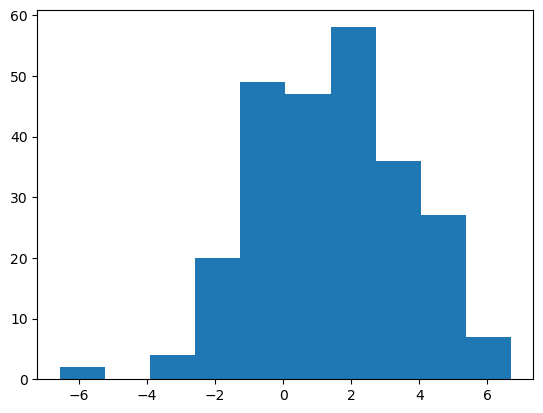

In [11]:
plt.hist(objective_value_diff[I]*100/objective_value_dict_exact[I])

In [12]:
uncr_no = np.array([result_exact[str(x)]['iterations_to_convergence'] for x in range(1,251)])

In [13]:
uncr_no.mean()

9.24